In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import json

In [4]:
hangouts = json.load(open('/home/gjones/Takeout/Hangouts/Hangouts.json'))

In [5]:
hangouts.keys()

[u'continuation_end_timestamp', u'conversation_state']

In [114]:
gaia_ids = {}
for conversation in hangouts['conversation_state']:
    for participant in conversation['conversation_state']['conversation']['participant_data']:
        try:
            gaia_id=participant['id']['gaia_id']
            name = participant['fallback_name']
            if gaia_id not in gaia_ids:
                gaia_ids[gaia_id] = name
                gaia_ids[name] = gaia_id
        except KeyError:
            pass


In [117]:
gaia_ids

{u'100664605187225385196': u'Rama Srinivasan',
 u'100882729762281224679': u'Bernadette Heyburn',
 u'101641183764354939669': u'Kaushal Buch',
 u'101947368488130578091': u'Claire Walton',
 u'102487417074694322789': u'hmccarick@gmail.com',
 u'102795510476282088531': u'Weiwei Zhu',
 u'103711585427315865201': u'Raajen Patel',
 u'103737347766647518054': u'Mark Wagner',
 u'104521624617198072679': u'Diva Jones',
 u'104521752555378422925': u'glenn.caltech@gmail.com',
 u'104786595709615733654': u'Daniel Chapman',
 u'105888541453997279343': u'Andrea Manzo',
 u'106246582169809309994': u'Sam Thomsen',
 u'107483561634597693507': u'Arthi Srinivasan',
 u'107939362453967657440': u'Nate Sheetz',
 u'107988880168676933045': u'BRADLEY DOBER',
 u'108087508423266363782': u'Emmanuel Fonseca',
 u'108845657525171660307': u'Aaron Esser-Kahn',
 u'108845914750751944082': u'Sean Bryan',
 u'109156619592688036943': u'George Che',
 u'109609613262437806784': u'Sarah Blood',
 u'110036363762514098886': u'alberto vecchio'

In [121]:
corpi = []
for conversation in hangouts['conversation_state']:
    by_sender = {}
    for event in conversation['conversation_state']['event']:
        try:
            text = '\n'.join([segment['text'] for segment in event['chat_message']['message_content']['segment']])
            gaia_id = event['sender_id']['gaia_id']
            timestamp = int(event['timestamp'])
        except KeyError:
            continue
        if gaia_id not in gaia_ids:
            print ("unknown id", gaia_id)
            continue
        so_far = by_sender.get(gaia_ids[gaia_id],[])
        so_far.append(dict(text=text,timestamp=timestamp))
        by_sender[gaia_ids[gaia_id]] = so_far
    if by_sender:
        corpi.append(by_sender)
            

unknown id 100671441518354514895


In [122]:
len(corpi)

22

In [123]:
import pandas as pd

In [124]:
rows = []
for cid,conv in enumerate(corpi):
    for sender,data in conv.items():
        for message in data:
            rows.append((cid,sender,message['timestamp'],message['text']))
df = pd.DataFrame(rows,columns=['cid', 'sender', 'timestamp', 'text'])

In [125]:
df.shape

(105952, 4)

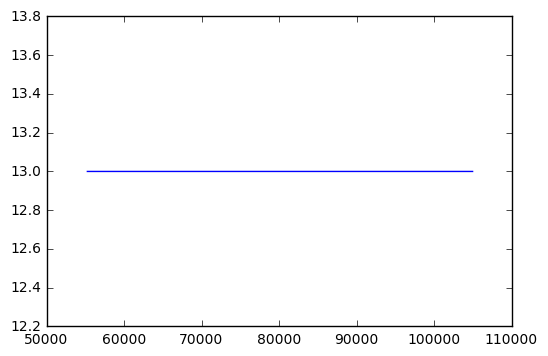

In [128]:
plot(df[df.sender=='Arthi Srinivasan'].cid)

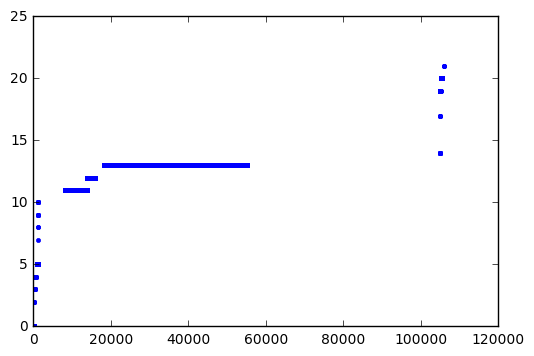

In [130]:
plot(df[df.sender=='glenn.caltech@gmail.com'].cid,'.')

In [131]:
wife = df[df.cid==13]

In [152]:
from_wife = wife[wife.sender=='Arthi Srinivasan']

In [153]:
from_wife.shape

(49709, 4)

In [154]:
to_wife = wife[wife.sender=='glenn.caltech@gmail.com']

In [155]:
to_wife.shape

(36929, 4)

In [168]:
import time

In [169]:
ts.max()/time.time()

999878.08373580768

In [173]:
ts = to_wife.timestamp.values
ts.sort()
print(time.ctime(ts[np.diff(ts/1e6).argmax()]/1e6))

Fri May 15 13:38:48 2015


In [176]:
np.diff(ts/1e6).max()/86400.

17.806328322440386

In [177]:
print(time.ctime(ts[np.diff(ts/1e6).argmax()+1]/1e6))

Tue Jun  2 08:59:55 2015


In [132]:
wife.shape

(86638, 4)

In [156]:
to_wife_corpus = ('\n'.join([row.text for k,row in to_wife.iterrows()])).lower().split()

In [288]:
from_wife_corpus = ('\n'.join([row.text for k,row in from_wife.iterrows()])).lower().split()

In [289]:
len(from_wife_corpus)

347512

In [157]:
len(to_wife_corpus)

207296

In [306]:
df.sender.value_counts()

Arthi Srinivasan            49709
glenn.caltech@gmail.com     45553
Daniel Flanigan              6996
Heather McCarrick            2484
Mark Wagner                   447
Sean Bryan                    238
BRADLEY DOBER                 234
Andrew Siemion                 95
Jayanth Chennamangalam         66
Tony Mroczkowski               34
Rurik Alejandro Primiani       19
Glenda Bilderback              16
Diva Jones                     14
Raajen Patel                   10
Joy Didier                      9
Rama Srinivasan                 9
Kaushal Buch                    6
Daniel Chapman                  4
Bernadette Heyburn              4
Aaron Esser-Kahn                2
Claire Walton                   1
Rolando Paz                     1
Nate Sheetz                     1
Name: sender, dtype: int64

(-1.0250401751889771,
 1.000000000001442,
 -1.0247493445195832,
 1.0193365382676962)

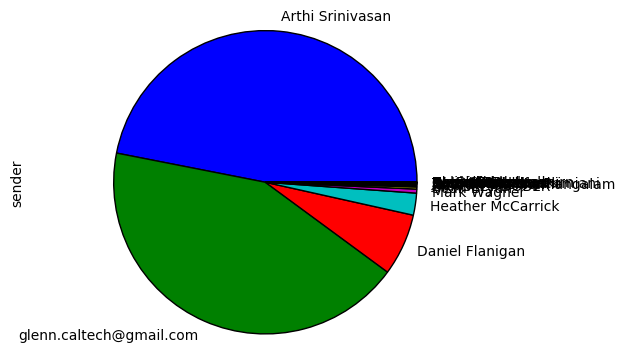

In [180]:
df.sender.value_counts().plot.pie()
axis('equal')

In [83]:
from collections import Counter

In [227]:
to_wife_corpus = [x.strip(',.:;!?') for x in to_wife_corpus]

In [290]:
from_wife_corpus = [x.strip(',.:;!?') for x in from_wife_corpus]

In [228]:
words_counts = dict(Counter(to_wife_corpus))

In [229]:
words = words_counts.keys()
counts = words_counts.values()

In [230]:
order = np.argsort(counts)

In [207]:
len(words)

17541

In [188]:
import urllib

In [190]:
urllib.urlretrieve('https://raw.githubusercontent.com/first20hours/google-10000-english/master/google-10000-english-usa.txt',
              'common_10000.txt')

('common_10000.txt', <httplib.HTTPMessage instance at 0x7f3b45ec9e60>)

In [210]:
common_words = open('common_10000.txt').read().split()

In [231]:
to_wife_less_common = [x for x in to_wife_corpus if x not in set(common_words[:100])]

In [291]:
from_wife_less_common = [x for x in from_wife_corpus if x not in set(common_words[:100])]

In [363]:
len(set(to_wife_corpus))

15155

In [364]:
len(set(from_wife_corpus))

20213

In [365]:
len(from_wife_corpus)

347512

In [366]:
len(to_wife_corpus)

207296

In [371]:
words_counts = dict(Counter(to_wife_less_common))
words = words_counts.keys()
counts = words_counts.values()
order = np.argsort(counts)
#for idx,k in enumerate(order[-100:][::-1]):
#    print (idx,words[k],counts[k])
#ger_vocab = np.array(counts)[order[::-1]]
#x = np.arange(1,len(order)+1)
#loglog(x,np.array(counts)[order[::-1]])
#loglog(x,300/(x/100.)**1.2)
#grid()

In [351]:
taj = list(set([x for x in from_wife_less_common if "taj" in x]) | set([x for x in to_wife_less_common if "taj" in x]) | {'st','shark'}
       | set([x for x in to_wife_less_common if "hark" in x]) | set([x for x in from_wife_less_common if "hark" in x]))
taj = set([x for x in taj if 'http' not in x])

In [352]:
taj

{u'"shark',
 u'"taj',
 u'(taj',
 u"(taj's)",
 u'babyshark',
 u'fatshark',
 u'pre-sweettaj',
 'shark',
 u'shark"s',
 u"shark's",
 u'shark)',
 u'shark:-(',
 u'shark>',
 u'sharkcake',
 u'sharking',
 u'sharkkkkk',
 u'sharks',
 u"sharks'",
 u'sharkshoes',
 u'sharkw',
 u'sharkxoxo',
 u'sharky',
 'st',
 u'sweeattaj',
 u'sweeetshark',
 u'sweeettaj',
 u'sweetshark',
 u'sweetshark!>!>',
 u'sweettaj',
 u"sweettaj's",
 u'sweetttaj',
 u'swettaj',
 u'swetttaj',
 u'swweettaj',
 u'taj',
 u'taj!"',
 u'taj"',
 u"taj's",
 u'taj-style',
 u'taj..."',
 u'tajbeads',
 u'tajbowl',
 u'taje',
 u'taji',
 u"tajj's",
 u'tajs',
 u'toshark'}

In [372]:
words_counts = dict(Counter(to_wife_less_common))
words = words_counts.keys()
counts = words_counts.values()
ger_taj_counts = {}
for k in taj:
    try:
        ger_taj_counts[k] = words_counts[k]
    except KeyError:
        pass
for idx,k in enumerate(order[-100:][::-1]):
    print (idx,words[k],counts[k])
#ger_vocab = np.array(counts)[order[::-1]]
#x = np.arange(1,len(order)+1)
#loglog(x,np.array(counts)[order[::-1]])
#loglog(x,300/(x/100.)**1.2)
#grid()

0 whir 2329
1 ) 2213
2 ok 1946
3 yeah 1728
4 just 1434
5 wife 1332
6 lol 1259
7 ger 1246
8 good 920
9 clyde 885
10 him 853
11 think 788
12 it's 755
13 got 734
14 yes 710
15 too 689
16 oh 658
17 did 628
18 going 609
19 go 591
20 should 552
21 says 538
22 taj 535
23 want 528
24 then 520
25 don't 511
26 maybe 509
27 xo 498
28 well 498
29 claude 498
30 had 492
31 i'm 474
32 very 469
33 didn't 457
34 i'll 455
35 -) 450
36 know 424
37 he's 420
38 hiwife 390
39 that's 382
40 st 375
41 bit 371
42 she 361
43 work 361
44 really 355
45 shark 354
46 said 350
47 back 344
48 lunch 331
49 today 329
50 still 329
51 could 328
52 im 328
53 mean 322
54 sure 318
55 off 314
56 might 314
57 much 311
58 them 307
59 gonna 304
60 cool 297
61 love 293
62 her 292
63 put 286
64 guess 285
65 leaving 284
66 after 280
67 morning 278
68 something 263
69 try 262
70 mow 261
71 because 258
72 way 257
73 whirf 254
74 w/ 252
75 right 252
76 getting 249
77 take 249
78 since 243
79 why 243
80 leave 236
81 nice 231
82 soon 2

In [362]:
ger_taj_counts

{u'"taj': 3,
 u'(taj': 1,
 'shark': 354,
 u"shark's": 18,
 u'shark)': 1,
 u'sharking': 2,
 u'sharks': 4,
 u'sharkw': 1,
 u'sharky': 1,
 'st': 375,
 u'sweeettaj': 1,
 u'sweetshark': 1,
 u'sweettaj': 18,
 u"sweettaj's": 1,
 u'taj': 535,
 u'taj!"': 1,
 u'taj"': 1,
 u"taj's": 21,
 u'taji': 2,
 u'tajs': 1,
 u'toshark': 1}

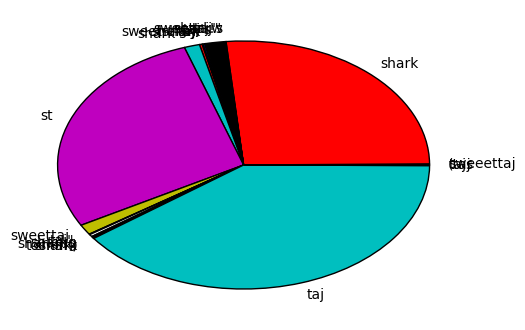

In [357]:
plt.pie(ger_taj_counts.values(),labels=ger_taj_counts.keys());

In [358]:
words_counts = dict(Counter(from_wife_less_common))
words = words_counts.keys()
counts = words_counts.values()
order = np.argsort(counts)
wife_taj_counts = {}
for k in taj:
    try:
        wife_taj_counts[k] = words_counts[k]
    except KeyError:
        pass
#x = np.arange(1,len(order)+1)
#loglog(x,np.array(counts)[order[::-1]])
#wife_vocab=np.array(counts)[order[::-1]]
#loglog(x,300/(x/100.)**1.2)
#grid()
#for idx,k in enumerate(order[-100:][::-1]):
#    print (idx,words[k],counts[k])

In [361]:
wife_taj_counts

{u'"shark': 2,
 u'"taj': 2,
 u"(taj's)": 1,
 u'babyshark': 1,
 u'fatshark': 1,
 u'pre-sweettaj': 1,
 'shark': 1537,
 u'shark"s': 2,
 u"shark's": 169,
 u'shark:-(': 1,
 u'shark>': 1,
 u'sharkcake': 1,
 u'sharking': 2,
 u'sharkkkkk': 1,
 u'sharks': 37,
 u"sharks'": 1,
 u'sharkshoes': 1,
 u'sharkxoxo': 1,
 'st': 909,
 u'sweeattaj': 1,
 u'sweeetshark': 1,
 u'sweeettaj': 4,
 u'sweetshark': 53,
 u'sweetshark!>!>': 1,
 u'sweettaj': 1011,
 u"sweettaj's": 30,
 u'sweetttaj': 1,
 u'swettaj': 2,
 u'swetttaj': 1,
 u'swweettaj': 1,
 u'taj': 811,
 u'taj"': 1,
 u"taj's": 54,
 u'taj-style': 1,
 u'taj..."': 1,
 u'tajbeads': 1,
 u'tajbowl': 1,
 u'taje': 1,
 u'taji': 3,
 u"tajj's": 1,
 u'tajs': 4}

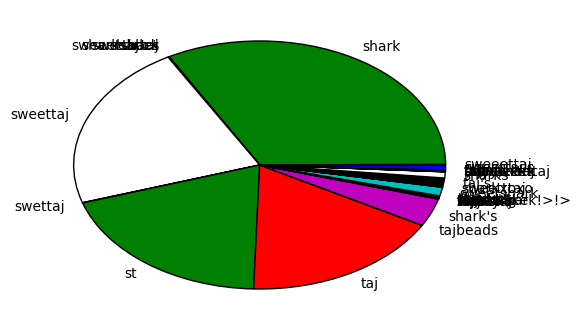

In [360]:
plt.pie(wife_taj_counts.values(),labels=wife_taj_counts.keys());

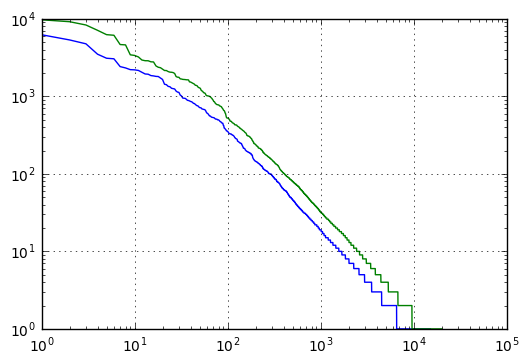

In [329]:
x = np.arange(1,len(ger_vocab)+1)
loglog(x,ger_vocab)
x = np.arange(1,len(wife_vocab)+1)
loglog(x,wife_vocab)
grid()

In [233]:
for idx,k in enumerate(order[-100:]):
    print (idx,words[k],counts[k])

0 night 192
1 pizza 194
2 ( 195
3 mom 196
4 make 196
5 over 197
6 into 199
7 dunno 201
8 packing 209
9 late 212
10 little 213
11 before 214
12 probably 214
13 last 214
14 train 215
15 around 222
16 need 224
17 soon 230
18 nice 231
19 leave 236
20 why 243
21 since 243
22 take 249
23 getting 249
24 right 252
25 w/ 252
26 whirf 254
27 way 257
28 because 258
29 mow 261
30 try 262
31 something 263
32 morning 278
33 after 280
34 leaving 284
35 guess 285
36 put 286
37 her 292
38 love 293
39 cool 297
40 gonna 304
41 them 307
42 much 311
43 might 314
44 off 314
45 sure 318
46 mean 322
47 im 328
48 could 328
49 still 329
50 today 329
51 lunch 331
52 back 344
53 said 350
54 shark 354
55 really 355
56 work 361
57 she 361
58 bit 371
59 st 375
60 that's 382
61 hiwife 390
62 he's 420
63 know 424
64 -) 450
65 i'll 455
66 didn't 457
67 very 469
68 i'm 474
69 had 492
70 claude 498
71 well 498
72 xo 498
73 maybe 509
74 don't 511
75 then 520
76 want 528
77 taj 535
78 says 538
79 should 552
80 go 591
81 go

In [234]:
for idx,k in enumerate(order[:100]):
    print (idx,words[k],counts[k])

0 urb-profeshs 1
1 ginos 1
2 modifier 1
3 meatball 1
4 physics/arthi 1
5 45-55 1
6 tommee 1
7 chainsmoking 1
8 (ending 1
9 thousands 1
10 edible 1
11 few,mins 1
12 somethinng 1
13 ttr 1
14 hundi-sticks 1
15 yjm 1
16 significantly 1
17 weather's 1
18 uppma 1
19 prone 1
20 groggily 1
21 monitas 1
22 misspell 1
23 geeks 1
24 earmarked 1
25 momsi 1
26 lists 1
27 givving 1
28 manipulation 1
29 liste 1
30 muertos 1
31 downfall 1
32 judt 1
33 slightest 1
34 halal 1
35 goodie 1
36 ceef 1
37 constrained 1
38 guv-nah 1
39 thte 1
40 cashier 1
41 enumerating 1
42 african 1
43 conductor 1
44 overmuch 1
45 dismay 1
46 smeared 1
47 overhearing 1
48 harrimans 1
49 ~10^3 1
50 scrambled 1
51 lowered 1
52 propels 1
53 francie's 1
54 choke 1
55 brigning 1
56 santas 1
57 robocon 1
58 bastard 1
59 cases 1
60 robocamp 1
61 sprinkled 1
62 lateralx 1
63 gagopa 1
64 detector 1
65 blades 1
66 qtip 1
67 dimming 1
68 nytimes 1
69 waayy 1
70 empanada 1
71 hiiii 1
72 walkup 1
73 diaperbag 1
74 fiish 1
75 noooooo 1
7

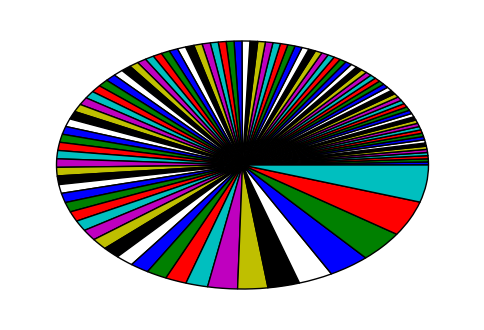

In [236]:
plt.pie(np.array(counts)[order[-100:]]);

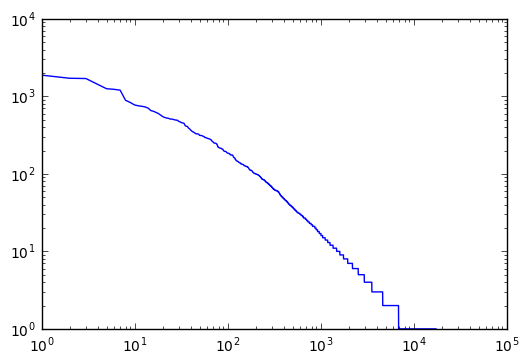

In [225]:
loglog(np.array(counts)[order[::-1]])

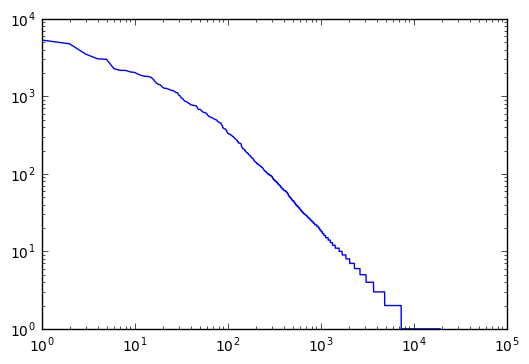

In [162]:
loglog(np.array(counts)[order[::-1]])

In [237]:
wife.columns

Index([u'cid', u'sender', u'timestamp', u'text'], dtype='object')

In [238]:
wife.shape

(86638, 4)

In [243]:
wife.sort_values(['timestamp'],inplace=True)

/data/home/gjones/anaconda/envs/pmc/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [252]:
last_timestamp = 0
documents = []
document = ''
for k,row in wife.iterrows():
    if (row.timestamp - last_timestamp)/1e6 > 10*60:
        if document:
            documents.append(document)
        document = row.text
    else:
        document = document + '\n' + row.text
    last_timestamp = row.timestamp
documents.append(document)

In [253]:
len(documents)

9453

In [373]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 10000
n_features = 2000
n_topics = 30
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

#print("Loading dataset...")
t0 = time.time()
#dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                             remove=('headers', 'footers', 'quotes'))
#data_samples = dataset.data[:n_samples]
#print("done in %0.3fs." % (time() - t0))
data_samples = documents#[:n_samples]

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,ngram_range=(1,1),
                                   max_features=n_features,
                                   stop_words='english')
t0 = time.time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time.time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,ngram_range=(1,1),
                                max_features=n_features,
                                stop_words='english')
t0 = time.time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time.time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time.time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time.time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time.time()
lda.fit(tf)
print("done in %0.3fs." % (time.time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extracting tf-idf features for NMF...
done in 0.855s.
Extracting tf features for LDA...
done in 0.850s.
Fitting the NMF model with tf-idf features, n_samples=10000 and n_features=2000...
done in 2.640s.

Topics in NMF model:
Topic #0:
like did think just ll know going want dont maybe time oh whirf really don need said guess mom today
Topic #1:
leaving finally yay sorry im minutes hopefully ok shortly long xo ugh prob mtg caught xoxo mow store dinner subway
Topic #2:
clyde says sweetdonald billionaire box alligators eww does sbc wants hunting bag sweetbabyclyde eyebrows going billionaires alligator lisa billionairefest getting
Topic #3:
higer mewth mow 96th yoga mrs nice love walk hiwife nevins cheese hows gym doing sushi busy gave train bagel
Topic #4:
home way headed come head ll bring dinner going time late walking pizza coming start tonight pls 30 need cool
Topic #5:
ger poor whirf sweet job snack robot needs whats bear leave excited wants remember love did make miss doesn din
Topic

In [310]:
len(documents)

9453

In [265]:
print(documents[-8002])

higer
just for funsies
i got an iced coffee
hiwife
mow???
ger and wife should have had a little breakfast adventure!
yes that's true
but ger was selfish
and thought only of himself
ger was in such a rush to get to glitter time at robot camp
thats why i should have married clyde
clyde patiently followed me into gregory's coffee
and follwed me to the milk counter


In [280]:
ts = wife.timestamp.values/1e6
ts.sort()
tbc = np.diff(ts)

In [279]:
ts.shape

(86638,)

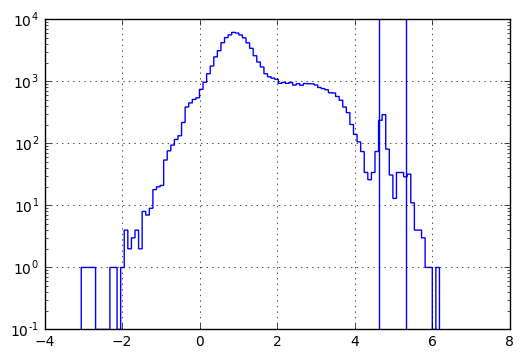

In [287]:
_=plt.hist(np.log10(tbc),histtype='step',bins=100,log=True)
grid()
axvline(np.log10(12*3600))
axvline(np.log10(60*3600))


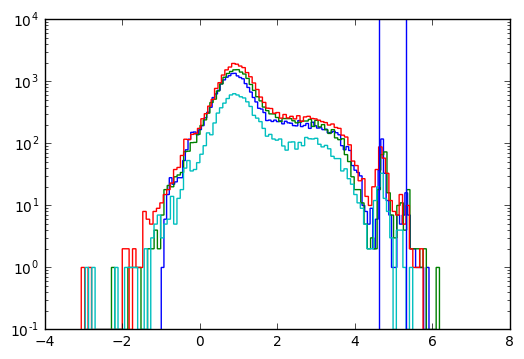

In [284]:
segsize=365*86400
end = ts.min()
while True:
    start = end
    if start > ts.max():
        break
    end = start + segsize
    startidx,stopidx = np.searchsorted(ts,(start,end))
    _=plt.hist(np.log10(tbc[startidx:stopidx]),histtype='step',bins=100,log=True)
axvline(np.log10(12*3600))
axvline(np.log10(60*3600))


In [273]:
tbc_order =np.argsort(tbc)

In [409]:
for idx in tbc_order[-20:]:
    print(time.ctime(ts[idx]), time.ctime(ts[idx+1]))

Thu Dec 29 21:47:18 2016 Mon Jan  2 12:54:34 2017
Fri Mar  4 15:46:24 2016 Tue Mar  8 08:15:44 2016
Fri Jan 16 16:13:25 2015 Tue Jan 20 09:08:10 2015
Fri Aug 29 14:01:00 2014 Tue Sep  2 08:07:05 2014
Thu Dec 25 12:36:24 2014 Mon Dec 29 08:12:45 2014
Thu Jul  2 11:24:24 2015 Mon Jul  6 09:19:15 2015
Wed Jun  4 19:21:17 2014 Sun Jun  8 23:04:33 2014
Thu Sep  1 16:58:51 2016 Tue Sep  6 08:05:16 2016
Thu Jul  3 17:34:23 2014 Tue Jul  8 09:02:35 2014
Wed Mar 11 14:55:26 2015 Mon Mar 16 06:58:34 2015
Wed Jun  3 17:32:01 2015 Mon Jun  8 20:24:27 2015
Wed Nov 27 18:19:01 2013 Tue Dec  3 09:37:23 2013
Fri Dec 19 17:51:04 2014 Thu Dec 25 11:55:57 2014
Wed Jul 20 16:57:18 2016 Tue Jul 26 15:01:09 2016
Mon Nov 23 13:57:03 2015 Mon Nov 30 07:06:24 2015
Mon Dec 23 18:20:43 2013 Mon Dec 30 16:20:38 2013
Mon Jun  8 20:24:51 2015 Tue Jun 16 08:59:38 2015
Wed Jan 21 17:06:20 2015 Thu Jan 29 09:21:21 2015
Fri Nov 21 18:11:06 2014 Mon Dec  1 07:15:07 2014
Fri May 15 14:21:41 2015 Tue Jun  2 08:59:55 2015


In [309]:
time.ctime(ts.max())

'Fri Mar 10 09:20:48 2017'